In [418]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math

In [419]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

In [421]:
def fpr(y_true,y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    fpr=fp/(fp+tn)
    return(fpr)

In [422]:
additional_metrics = ['accuracy']
loss_function = BinaryCrossentropy()
number_of_epochs = 500
optimizer = Adam()
verbosity_mode = 0
layer_size = 10

In [423]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [424]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [425]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Data generation

In [465]:
m=75000
n=25000
#m=40
#n=30
r=0.5

In [466]:
x_pos = np.random.normal(loc=250, scale=100, size=(m//2))
x_neg = np.random.normal(loc=750, scale=100, size=(m//2))

x_train = np.concatenate((x_pos, x_neg)).reshape(-1, 1).astype(int)
y_t=y_train = np.concatenate((np.ones(m//2), np.zeros(m//2))).reshape(-1, 1).astype(int)

In [467]:
x_train.shape

(75000, 1)

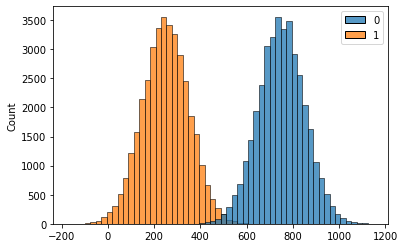

In [468]:
sns.histplot(x=x_train.flatten(), hue=y_train.flatten())

## Model training

In [469]:
batch_size = len(x_train)

In [470]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

In [471]:
model.metrics_names


['loss', 'acc']

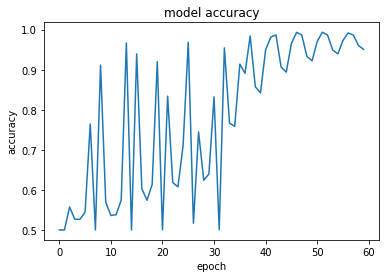

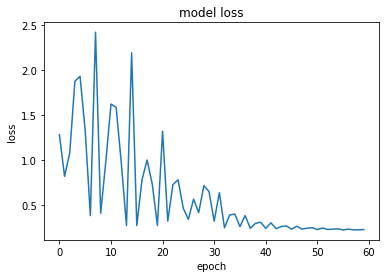

In [472]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

In [473]:
number_of_epochs = 150
layer_size = 50

In [474]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [475]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [476]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [477]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

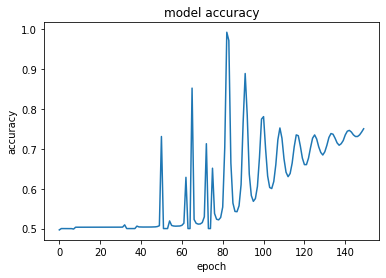

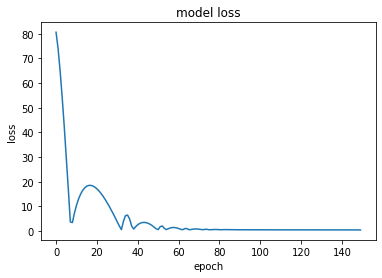

In [478]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=50

In [479]:
layer_size = 200
number_of_epochs = 100
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 201       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


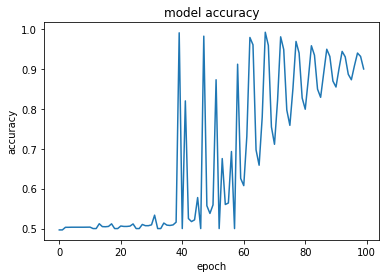

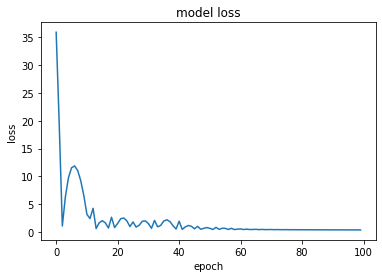

In [480]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=200

In [481]:
number_of_epochs = 60
layer_size = 1000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 1000)              2000      
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


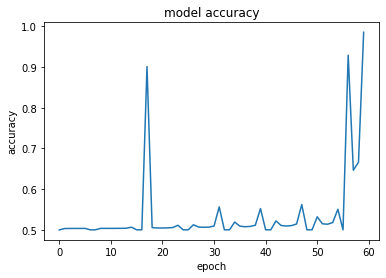

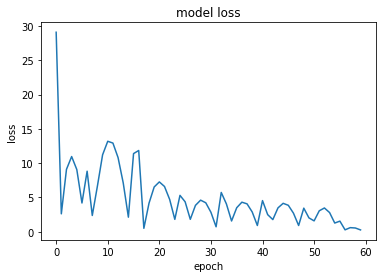

In [482]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=1000

In [483]:
class BloomFilter:
    
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        
    def add(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            self.bit_array[result] = 1
            
    def lookup(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            if self.bit_array[result] == 0:
                return False
        return True

#adds ratio r of an array of random integers of size n to bloom filter bf(input : bf,size,ratio; output: data array)
def addrandom(bf,n,r):
    data=np.empty(n,dtype=int)
    for i in range(0,n):
        data[i]=random.randint(0, 100000000)
    for j in range(0,int(n*r)):
        bf.add(data[j]);
    return data

#(Input:bloom filter,number array,ratio of positives; Output:(-1) for false negative, otherwise fpr)
def fpr(bf,nums,r):
    for i in range(int(len(nums)*r)):
        if(bf.lookup(nums[i])==False):
            print(nums[i])
            return -1
    count = 0
    for i in range(int(len(nums)*r),len(nums)):
        if(bf.lookup(nums[i])==True):
            count+=1
    return count/(len(nums)-int(len(nums)*r))

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k

#(Input:size of bloom filter, number of hash functions, total numbers, ratio of numbers inserted; Output: fpr)
def find_fpr(m,k,n,r):
    bf=BloomFilter(m,k)
    data=addrandom(bf,n,r)
    return fpr(bf,data,r)

#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    k=eff_k(m,n,r)
    find_fpr(m,k,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [484]:
def load_bloom(model,data_x,data_y,bf,n):
    y_pred = model.predict(data_x)
    for i in range(0,n):
        if((y_pred[i]<=0.99)and(data_y[i]==1)):
            print(f'{data_x[i]}{i} inserted to bf')
            bf.add(data_x[i])

In [485]:
#m=75000
#n=25000
#r=0.5
k=eff_k(m,n,r)
bf=BloomFilter(m,k)

In [486]:
load_bloom(model,x_train,y_train,bf,n)

[316]0 inserted to bf
[97]1 inserted to bf
[360]2 inserted to bf
[272]3 inserted to bf
[195]4 inserted to bf
[448]5 inserted to bf
[235]6 inserted to bf
[39]7 inserted to bf
[132]8 inserted to bf
[417]9 inserted to bf
[143]10 inserted to bf
[373]11 inserted to bf
[339]12 inserted to bf
[483]13 inserted to bf
[385]14 inserted to bf
[3]15 inserted to bf
[390]16 inserted to bf
[259]17 inserted to bf
[173]18 inserted to bf
[250]19 inserted to bf
[412]20 inserted to bf
[165]21 inserted to bf
[152]22 inserted to bf
[144]23 inserted to bf
[356]24 inserted to bf
[83]25 inserted to bf
[300]26 inserted to bf
[344]27 inserted to bf
[363]28 inserted to bf
[134]29 inserted to bf
[234]30 inserted to bf
[285]31 inserted to bf
[255]32 inserted to bf
[214]33 inserted to bf
[282]34 inserted to bf
[211]35 inserted to bf
[140]36 inserted to bf
[292]37 inserted to bf
[464]38 inserted to bf
[218]39 inserted to bf
[112]40 inserted to bf
[295]41 inserted to bf
[213]42 inserted to bf
[158]43 inserted to bf
[16

[170]548 inserted to bf
[342]549 inserted to bf
[238]550 inserted to bf
[392]551 inserted to bf
[231]552 inserted to bf
[341]553 inserted to bf
[385]554 inserted to bf
[259]555 inserted to bf
[230]556 inserted to bf
[169]557 inserted to bf
[297]558 inserted to bf
[180]559 inserted to bf
[262]560 inserted to bf
[312]561 inserted to bf
[109]562 inserted to bf
[243]563 inserted to bf
[298]564 inserted to bf
[154]565 inserted to bf
[313]566 inserted to bf
[115]567 inserted to bf
[205]568 inserted to bf
[318]569 inserted to bf
[367]570 inserted to bf
[308]571 inserted to bf
[183]572 inserted to bf
[415]573 inserted to bf
[176]574 inserted to bf
[305]575 inserted to bf
[36]576 inserted to bf
[97]577 inserted to bf
[313]578 inserted to bf
[200]579 inserted to bf
[147]580 inserted to bf
[298]581 inserted to bf
[290]582 inserted to bf
[378]583 inserted to bf
[427]584 inserted to bf
[327]585 inserted to bf
[329]586 inserted to bf
[190]587 inserted to bf
[293]588 inserted to bf
[305]589 inserted 

[348]975 inserted to bf
[141]976 inserted to bf
[319]977 inserted to bf
[139]978 inserted to bf
[398]979 inserted to bf
[368]980 inserted to bf
[201]981 inserted to bf
[256]982 inserted to bf
[112]983 inserted to bf
[276]984 inserted to bf
[125]985 inserted to bf
[271]986 inserted to bf
[216]987 inserted to bf
[381]988 inserted to bf
[298]989 inserted to bf
[500]990 inserted to bf
[26]991 inserted to bf
[277]992 inserted to bf
[263]993 inserted to bf
[293]994 inserted to bf
[303]995 inserted to bf
[168]996 inserted to bf
[43]997 inserted to bf
[343]998 inserted to bf
[200]999 inserted to bf
[187]1000 inserted to bf
[321]1001 inserted to bf
[248]1002 inserted to bf
[377]1003 inserted to bf
[281]1004 inserted to bf
[189]1005 inserted to bf
[252]1006 inserted to bf
[283]1007 inserted to bf
[146]1008 inserted to bf
[139]1009 inserted to bf
[437]1010 inserted to bf
[106]1011 inserted to bf
[321]1012 inserted to bf
[299]1013 inserted to bf
[218]1014 inserted to bf
[384]1015 inserted to bf
[4

[284]1309 inserted to bf
[311]1310 inserted to bf
[218]1311 inserted to bf
[380]1312 inserted to bf
[262]1313 inserted to bf
[239]1314 inserted to bf
[224]1315 inserted to bf
[262]1316 inserted to bf
[156]1317 inserted to bf
[252]1318 inserted to bf
[396]1319 inserted to bf
[237]1320 inserted to bf
[318]1321 inserted to bf
[269]1322 inserted to bf
[130]1323 inserted to bf
[281]1324 inserted to bf
[97]1325 inserted to bf
[80]1326 inserted to bf
[244]1327 inserted to bf
[255]1328 inserted to bf
[140]1329 inserted to bf
[235]1330 inserted to bf
[236]1331 inserted to bf
[210]1332 inserted to bf
[229]1333 inserted to bf
[320]1334 inserted to bf
[392]1335 inserted to bf
[422]1336 inserted to bf
[215]1337 inserted to bf
[49]1338 inserted to bf
[275]1339 inserted to bf
[261]1340 inserted to bf
[294]1341 inserted to bf
[373]1342 inserted to bf
[219]1343 inserted to bf
[365]1344 inserted to bf
[213]1345 inserted to bf
[291]1346 inserted to bf
[284]1347 inserted to bf
[418]1348 inserted to bf
[24

[197]1862 inserted to bf
[136]1863 inserted to bf
[256]1864 inserted to bf
[342]1865 inserted to bf
[279]1866 inserted to bf
[354]1867 inserted to bf
[222]1868 inserted to bf
[186]1869 inserted to bf
[259]1870 inserted to bf
[243]1871 inserted to bf
[373]1872 inserted to bf
[229]1873 inserted to bf
[218]1874 inserted to bf
[216]1875 inserted to bf
[163]1876 inserted to bf
[307]1877 inserted to bf
[127]1878 inserted to bf
[113]1879 inserted to bf
[273]1880 inserted to bf
[308]1881 inserted to bf
[229]1882 inserted to bf
[255]1883 inserted to bf
[237]1884 inserted to bf
[346]1885 inserted to bf
[117]1886 inserted to bf
[301]1887 inserted to bf
[136]1888 inserted to bf
[146]1889 inserted to bf
[388]1890 inserted to bf
[310]1891 inserted to bf
[398]1892 inserted to bf
[353]1893 inserted to bf
[245]1894 inserted to bf
[337]1895 inserted to bf
[154]1896 inserted to bf
[161]1897 inserted to bf
[21]1898 inserted to bf
[124]1899 inserted to bf
[281]1900 inserted to bf
[236]1901 inserted to bf
[

[386]2233 inserted to bf
[262]2234 inserted to bf
[240]2235 inserted to bf
[195]2236 inserted to bf
[367]2237 inserted to bf
[217]2238 inserted to bf
[541]2239 inserted to bf
[325]2240 inserted to bf
[231]2241 inserted to bf
[304]2242 inserted to bf
[150]2243 inserted to bf
[228]2244 inserted to bf
[310]2245 inserted to bf
[185]2246 inserted to bf
[283]2247 inserted to bf
[265]2248 inserted to bf
[378]2249 inserted to bf
[204]2250 inserted to bf
[209]2251 inserted to bf
[270]2252 inserted to bf
[184]2253 inserted to bf
[293]2254 inserted to bf
[332]2255 inserted to bf
[217]2256 inserted to bf
[240]2257 inserted to bf
[396]2258 inserted to bf
[249]2259 inserted to bf
[306]2260 inserted to bf
[38]2261 inserted to bf
[321]2262 inserted to bf
[304]2263 inserted to bf
[221]2264 inserted to bf
[88]2265 inserted to bf
[284]2266 inserted to bf
[26]2267 inserted to bf
[217]2268 inserted to bf
[110]2269 inserted to bf
[352]2270 inserted to bf
[464]2271 inserted to bf
[171]2272 inserted to bf
[49

[246]2582 inserted to bf
[158]2583 inserted to bf
[148]2584 inserted to bf
[170]2585 inserted to bf
[360]2586 inserted to bf
[337]2587 inserted to bf
[124]2588 inserted to bf
[224]2589 inserted to bf
[152]2590 inserted to bf
[387]2591 inserted to bf
[296]2592 inserted to bf
[323]2593 inserted to bf
[196]2594 inserted to bf
[279]2595 inserted to bf
[397]2596 inserted to bf
[328]2597 inserted to bf
[248]2598 inserted to bf
[227]2599 inserted to bf
[197]2600 inserted to bf
[73]2601 inserted to bf
[234]2602 inserted to bf
[127]2603 inserted to bf
[163]2604 inserted to bf
[66]2605 inserted to bf
[180]2606 inserted to bf
[368]2607 inserted to bf
[172]2608 inserted to bf
[220]2609 inserted to bf
[261]2610 inserted to bf
[180]2611 inserted to bf
[265]2612 inserted to bf
[379]2613 inserted to bf
[191]2614 inserted to bf
[159]2615 inserted to bf
[79]2616 inserted to bf
[410]2617 inserted to bf
[161]2618 inserted to bf
[170]2619 inserted to bf
[357]2620 inserted to bf
[303]2621 inserted to bf
[30

[409]2958 inserted to bf
[229]2959 inserted to bf
[215]2960 inserted to bf
[304]2961 inserted to bf
[309]2962 inserted to bf
[323]2963 inserted to bf
[273]2964 inserted to bf
[255]2965 inserted to bf
[186]2966 inserted to bf
[442]2967 inserted to bf
[344]2968 inserted to bf
[60]2969 inserted to bf
[230]2970 inserted to bf
[194]2971 inserted to bf
[154]2972 inserted to bf
[129]2973 inserted to bf
[240]2974 inserted to bf
[270]2975 inserted to bf
[145]2976 inserted to bf
[101]2977 inserted to bf
[184]2978 inserted to bf
[252]2979 inserted to bf
[209]2980 inserted to bf
[282]2981 inserted to bf
[151]2982 inserted to bf
[100]2983 inserted to bf
[299]2984 inserted to bf
[55]2985 inserted to bf
[308]2986 inserted to bf
[292]2987 inserted to bf
[90]2988 inserted to bf
[297]2989 inserted to bf
[179]2990 inserted to bf
[236]2991 inserted to bf
[262]2992 inserted to bf
[229]2993 inserted to bf
[275]2994 inserted to bf
[231]2995 inserted to bf
[217]2996 inserted to bf
[208]2997 inserted to bf
[43

[142]3499 inserted to bf
[316]3500 inserted to bf
[210]3501 inserted to bf
[152]3502 inserted to bf
[388]3503 inserted to bf
[313]3504 inserted to bf
[364]3505 inserted to bf
[265]3506 inserted to bf
[153]3507 inserted to bf
[287]3508 inserted to bf
[149]3509 inserted to bf
[293]3510 inserted to bf
[334]3511 inserted to bf
[264]3512 inserted to bf
[212]3513 inserted to bf
[344]3514 inserted to bf
[263]3515 inserted to bf
[272]3516 inserted to bf
[334]3517 inserted to bf
[165]3518 inserted to bf
[166]3519 inserted to bf
[168]3520 inserted to bf
[389]3521 inserted to bf
[140]3522 inserted to bf
[412]3523 inserted to bf
[227]3524 inserted to bf
[260]3525 inserted to bf
[221]3526 inserted to bf
[316]3527 inserted to bf
[263]3528 inserted to bf
[251]3529 inserted to bf
[103]3530 inserted to bf
[223]3531 inserted to bf
[279]3532 inserted to bf
[248]3533 inserted to bf
[166]3534 inserted to bf
[249]3535 inserted to bf
[267]3536 inserted to bf
[84]3537 inserted to bf
[351]3538 inserted to bf
[

[278]3946 inserted to bf
[230]3947 inserted to bf
[397]3948 inserted to bf
[307]3949 inserted to bf
[345]3950 inserted to bf
[247]3951 inserted to bf
[413]3952 inserted to bf
[461]3953 inserted to bf
[132]3954 inserted to bf
[244]3955 inserted to bf
[317]3956 inserted to bf
[57]3957 inserted to bf
[110]3958 inserted to bf
[200]3959 inserted to bf
[223]3960 inserted to bf
[152]3961 inserted to bf
[300]3962 inserted to bf
[321]3963 inserted to bf
[195]3964 inserted to bf
[147]3965 inserted to bf
[220]3966 inserted to bf
[224]3967 inserted to bf
[47]3968 inserted to bf
[283]3969 inserted to bf
[310]3970 inserted to bf
[145]3971 inserted to bf
[363]3972 inserted to bf
[373]3973 inserted to bf
[176]3974 inserted to bf
[330]3975 inserted to bf
[125]3976 inserted to bf
[207]3977 inserted to bf
[148]3978 inserted to bf
[300]3979 inserted to bf
[349]3980 inserted to bf
[70]3981 inserted to bf
[224]3982 inserted to bf
[60]3983 inserted to bf
[73]3984 inserted to bf
[94]3985 inserted to bf
[313]3

[209]4297 inserted to bf
[194]4299 inserted to bf
[327]4300 inserted to bf
[279]4301 inserted to bf
[215]4302 inserted to bf
[168]4303 inserted to bf
[331]4304 inserted to bf
[175]4305 inserted to bf
[128]4306 inserted to bf
[288]4307 inserted to bf
[341]4308 inserted to bf
[429]4309 inserted to bf
[318]4310 inserted to bf
[198]4311 inserted to bf
[334]4312 inserted to bf
[188]4313 inserted to bf
[271]4314 inserted to bf
[237]4315 inserted to bf
[197]4316 inserted to bf
[381]4317 inserted to bf
[260]4318 inserted to bf
[151]4319 inserted to bf
[159]4320 inserted to bf
[223]4321 inserted to bf
[385]4322 inserted to bf
[339]4323 inserted to bf
[249]4324 inserted to bf
[316]4325 inserted to bf
[159]4326 inserted to bf
[232]4327 inserted to bf
[317]4328 inserted to bf
[234]4329 inserted to bf
[173]4330 inserted to bf
[402]4331 inserted to bf
[206]4332 inserted to bf
[72]4333 inserted to bf
[81]4334 inserted to bf
[359]4336 inserted to bf
[301]4337 inserted to bf
[100]4338 inserted to bf
[2

[160]4685 inserted to bf
[317]4686 inserted to bf
[134]4687 inserted to bf
[294]4688 inserted to bf
[149]4689 inserted to bf
[216]4690 inserted to bf
[252]4691 inserted to bf
[195]4692 inserted to bf
[200]4693 inserted to bf
[349]4694 inserted to bf
[189]4695 inserted to bf
[317]4696 inserted to bf
[295]4697 inserted to bf
[224]4698 inserted to bf
[321]4699 inserted to bf
[114]4700 inserted to bf
[254]4701 inserted to bf
[232]4702 inserted to bf
[262]4703 inserted to bf
[179]4704 inserted to bf
[244]4705 inserted to bf
[172]4706 inserted to bf
[403]4707 inserted to bf
[200]4708 inserted to bf
[318]4709 inserted to bf
[142]4710 inserted to bf
[87]4711 inserted to bf
[296]4712 inserted to bf
[184]4713 inserted to bf
[312]4714 inserted to bf
[190]4715 inserted to bf
[327]4716 inserted to bf
[320]4717 inserted to bf
[178]4718 inserted to bf
[196]4719 inserted to bf
[370]4720 inserted to bf
[259]4721 inserted to bf
[361]4722 inserted to bf
[290]4723 inserted to bf
[150]4724 inserted to bf
[

[311]5108 inserted to bf
[386]5109 inserted to bf
[189]5110 inserted to bf
[242]5111 inserted to bf
[272]5112 inserted to bf
[264]5113 inserted to bf
[260]5114 inserted to bf
[380]5115 inserted to bf
[167]5116 inserted to bf
[280]5117 inserted to bf
[271]5118 inserted to bf
[207]5119 inserted to bf
[323]5120 inserted to bf
[178]5121 inserted to bf
[373]5122 inserted to bf
[136]5123 inserted to bf
[252]5124 inserted to bf
[241]5125 inserted to bf
[200]5126 inserted to bf
[185]5127 inserted to bf
[127]5128 inserted to bf
[214]5129 inserted to bf
[78]5130 inserted to bf
[290]5131 inserted to bf
[224]5132 inserted to bf
[177]5133 inserted to bf
[174]5134 inserted to bf
[252]5135 inserted to bf
[121]5136 inserted to bf
[240]5137 inserted to bf
[348]5138 inserted to bf
[233]5139 inserted to bf
[182]5140 inserted to bf
[85]5141 inserted to bf
[191]5142 inserted to bf
[37]5143 inserted to bf
[215]5144 inserted to bf
[285]5145 inserted to bf
[190]5146 inserted to bf
[293]5147 inserted to bf
[35

[250]5473 inserted to bf
[292]5474 inserted to bf
[66]5475 inserted to bf
[225]5476 inserted to bf
[52]5477 inserted to bf
[218]5478 inserted to bf
[258]5479 inserted to bf
[289]5480 inserted to bf
[271]5481 inserted to bf
[257]5482 inserted to bf
[29]5483 inserted to bf
[144]5484 inserted to bf
[185]5485 inserted to bf
[231]5486 inserted to bf
[404]5487 inserted to bf
[316]5488 inserted to bf
[295]5489 inserted to bf
[179]5490 inserted to bf
[467]5491 inserted to bf
[261]5492 inserted to bf
[155]5493 inserted to bf
[349]5494 inserted to bf
[280]5495 inserted to bf
[457]5496 inserted to bf
[134]5497 inserted to bf
[90]5498 inserted to bf
[272]5499 inserted to bf
[199]5500 inserted to bf
[291]5501 inserted to bf
[429]5502 inserted to bf
[220]5503 inserted to bf
[286]5504 inserted to bf
[342]5505 inserted to bf
[353]5506 inserted to bf
[234]5507 inserted to bf
[176]5508 inserted to bf
[248]5509 inserted to bf
[77]5510 inserted to bf
[92]5511 inserted to bf
[344]5512 inserted to bf
[197]5

[502]5950 inserted to bf
[299]5951 inserted to bf
[337]5952 inserted to bf
[460]5953 inserted to bf
[184]5954 inserted to bf
[472]5955 inserted to bf
[78]5956 inserted to bf
[394]5957 inserted to bf
[294]5958 inserted to bf
[242]5959 inserted to bf
[383]5960 inserted to bf
[312]5961 inserted to bf
[361]5962 inserted to bf
[222]5963 inserted to bf
[336]5964 inserted to bf
[203]5965 inserted to bf
[331]5966 inserted to bf
[248]5967 inserted to bf
[287]5968 inserted to bf
[305]5969 inserted to bf
[312]5970 inserted to bf
[232]5971 inserted to bf
[358]5972 inserted to bf
[277]5973 inserted to bf
[220]5974 inserted to bf
[361]5975 inserted to bf
[468]5976 inserted to bf
[141]5977 inserted to bf
[164]5978 inserted to bf
[300]5979 inserted to bf
[148]5980 inserted to bf
[309]5981 inserted to bf
[159]5982 inserted to bf
[249]5983 inserted to bf
[145]5984 inserted to bf
[353]5985 inserted to bf
[157]5986 inserted to bf
[234]5987 inserted to bf
[216]5988 inserted to bf
[83]5989 inserted to bf
[2

[315]6582 inserted to bf
[360]6583 inserted to bf
[299]6584 inserted to bf
[234]6585 inserted to bf
[267]6586 inserted to bf
[269]6587 inserted to bf
[297]6588 inserted to bf
[314]6589 inserted to bf
[82]6590 inserted to bf
[220]6591 inserted to bf
[313]6592 inserted to bf
[203]6593 inserted to bf
[219]6594 inserted to bf
[454]6595 inserted to bf
[206]6596 inserted to bf
[375]6597 inserted to bf
[171]6598 inserted to bf
[116]6599 inserted to bf
[291]6600 inserted to bf
[274]6601 inserted to bf
[414]6602 inserted to bf
[348]6603 inserted to bf
[276]6604 inserted to bf
[118]6605 inserted to bf
[369]6606 inserted to bf
[355]6607 inserted to bf
[226]6608 inserted to bf
[326]6609 inserted to bf
[448]6610 inserted to bf
[412]6611 inserted to bf
[334]6612 inserted to bf
[368]6613 inserted to bf
[540]6614 inserted to bf
[360]6615 inserted to bf
[437]6616 inserted to bf
[139]6617 inserted to bf
[294]6618 inserted to bf
[127]6619 inserted to bf
[65]6620 inserted to bf
[308]6621 inserted to bf
[2

[34]6931 inserted to bf
[400]6932 inserted to bf
[429]6933 inserted to bf
[264]6934 inserted to bf
[95]6935 inserted to bf
[311]6936 inserted to bf
[156]6937 inserted to bf
[288]6938 inserted to bf
[387]6939 inserted to bf
[372]6940 inserted to bf
[191]6941 inserted to bf
[203]6942 inserted to bf
[11]6943 inserted to bf
[400]6944 inserted to bf
[152]6945 inserted to bf
[232]6946 inserted to bf
[389]6947 inserted to bf
[293]6948 inserted to bf
[77]6949 inserted to bf
[189]6950 inserted to bf
[189]6951 inserted to bf
[383]6952 inserted to bf
[256]6953 inserted to bf
[114]6954 inserted to bf
[208]6955 inserted to bf
[235]6956 inserted to bf
[333]6957 inserted to bf
[215]6958 inserted to bf
[231]6959 inserted to bf
[108]6960 inserted to bf
[198]6961 inserted to bf
[98]6962 inserted to bf
[181]6963 inserted to bf
[374]6964 inserted to bf
[312]6965 inserted to bf
[390]6966 inserted to bf
[273]6967 inserted to bf
[285]6968 inserted to bf
[285]6969 inserted to bf
[145]6970 inserted to bf
[215]

[270]7291 inserted to bf
[287]7292 inserted to bf
[148]7293 inserted to bf
[202]7294 inserted to bf
[187]7295 inserted to bf
[169]7296 inserted to bf
[380]7297 inserted to bf
[116]7298 inserted to bf
[94]7299 inserted to bf
[415]7300 inserted to bf
[362]7301 inserted to bf
[402]7302 inserted to bf
[93]7303 inserted to bf
[236]7304 inserted to bf
[179]7305 inserted to bf
[300]7307 inserted to bf
[228]7308 inserted to bf
[232]7309 inserted to bf
[266]7310 inserted to bf
[117]7311 inserted to bf
[148]7312 inserted to bf
[278]7313 inserted to bf
[238]7314 inserted to bf
[383]7315 inserted to bf
[237]7316 inserted to bf
[24]7317 inserted to bf
[387]7318 inserted to bf
[169]7319 inserted to bf
[187]7320 inserted to bf
[310]7321 inserted to bf
[271]7322 inserted to bf
[70]7323 inserted to bf
[252]7324 inserted to bf
[282]7325 inserted to bf
[235]7326 inserted to bf
[319]7327 inserted to bf
[260]7328 inserted to bf
[210]7329 inserted to bf
[224]7330 inserted to bf
[89]7331 inserted to bf
[195]

[289]7813 inserted to bf
[375]7814 inserted to bf
[418]7815 inserted to bf
[362]7816 inserted to bf
[124]7817 inserted to bf
[292]7818 inserted to bf
[230]7819 inserted to bf
[327]7820 inserted to bf
[250]7821 inserted to bf
[223]7822 inserted to bf
[388]7823 inserted to bf
[145]7824 inserted to bf
[117]7825 inserted to bf
[189]7826 inserted to bf
[386]7827 inserted to bf
[280]7828 inserted to bf
[197]7829 inserted to bf
[226]7830 inserted to bf
[269]7831 inserted to bf
[218]7832 inserted to bf
[232]7833 inserted to bf
[166]7834 inserted to bf
[485]7835 inserted to bf
[177]7836 inserted to bf
[314]7837 inserted to bf
[189]7838 inserted to bf
[285]7839 inserted to bf
[192]7840 inserted to bf
[279]7841 inserted to bf
[359]7842 inserted to bf
[355]7843 inserted to bf
[99]7844 inserted to bf
[264]7845 inserted to bf
[330]7846 inserted to bf
[372]7847 inserted to bf
[274]7848 inserted to bf
[161]7849 inserted to bf
[200]7850 inserted to bf
[89]7851 inserted to bf
[269]7852 inserted to bf
[1

[337]8206 inserted to bf
[153]8207 inserted to bf
[208]8208 inserted to bf
[52]8209 inserted to bf
[41]8210 inserted to bf
[268]8211 inserted to bf
[231]8212 inserted to bf
[229]8213 inserted to bf
[202]8214 inserted to bf
[287]8215 inserted to bf
[256]8216 inserted to bf
[241]8217 inserted to bf
[282]8218 inserted to bf
[99]8219 inserted to bf
[404]8220 inserted to bf
[245]8221 inserted to bf
[332]8222 inserted to bf
[304]8223 inserted to bf
[462]8224 inserted to bf
[225]8226 inserted to bf
[316]8227 inserted to bf
[526]8228 inserted to bf
[249]8229 inserted to bf
[255]8230 inserted to bf
[84]8231 inserted to bf
[436]8232 inserted to bf
[185]8233 inserted to bf
[417]8234 inserted to bf
[289]8235 inserted to bf
[205]8236 inserted to bf
[206]8237 inserted to bf
[391]8238 inserted to bf
[438]8239 inserted to bf
[329]8240 inserted to bf
[165]8241 inserted to bf
[360]8242 inserted to bf
[267]8243 inserted to bf
[96]8244 inserted to bf
[275]8245 inserted to bf
[281]8246 inserted to bf
[214]

[284]8538 inserted to bf
[427]8539 inserted to bf
[241]8540 inserted to bf
[175]8541 inserted to bf
[105]8542 inserted to bf
[358]8543 inserted to bf
[297]8544 inserted to bf
[264]8545 inserted to bf
[276]8546 inserted to bf
[364]8547 inserted to bf
[379]8548 inserted to bf
[182]8549 inserted to bf
[217]8550 inserted to bf
[219]8551 inserted to bf
[84]8552 inserted to bf
[408]8553 inserted to bf
[184]8554 inserted to bf
[184]8555 inserted to bf
[330]8556 inserted to bf
[430]8557 inserted to bf
[280]8558 inserted to bf
[258]8559 inserted to bf
[199]8560 inserted to bf
[197]8561 inserted to bf
[212]8562 inserted to bf
[117]8563 inserted to bf
[403]8564 inserted to bf
[119]8565 inserted to bf
[257]8566 inserted to bf
[186]8567 inserted to bf
[271]8568 inserted to bf
[282]8569 inserted to bf
[99]8570 inserted to bf
[148]8571 inserted to bf
[305]8572 inserted to bf
[256]8573 inserted to bf
[29]8574 inserted to bf
[173]8575 inserted to bf
[302]8576 inserted to bf
[154]8577 inserted to bf
[17

[99]8951 inserted to bf
[190]8952 inserted to bf
[300]8953 inserted to bf
[355]8954 inserted to bf
[320]8955 inserted to bf
[222]8956 inserted to bf
[466]8957 inserted to bf
[100]8958 inserted to bf
[104]8959 inserted to bf
[219]8960 inserted to bf
[200]8961 inserted to bf
[162]8962 inserted to bf
[366]8963 inserted to bf
[140]8964 inserted to bf
[115]8965 inserted to bf
[374]8966 inserted to bf
[119]8967 inserted to bf
[217]8968 inserted to bf
[321]8969 inserted to bf
[300]8970 inserted to bf
[222]8971 inserted to bf
[183]8972 inserted to bf
[96]8973 inserted to bf
[183]8974 inserted to bf
[72]8975 inserted to bf
[148]8976 inserted to bf
[428]8977 inserted to bf
[276]8978 inserted to bf
[339]8979 inserted to bf
[134]8980 inserted to bf
[393]8981 inserted to bf
[304]8982 inserted to bf
[248]8983 inserted to bf
[178]8984 inserted to bf
[363]8985 inserted to bf
[181]8986 inserted to bf
[332]8987 inserted to bf
[421]8988 inserted to bf
[334]8989 inserted to bf
[77]8990 inserted to bf
[302

[227]9434 inserted to bf
[280]9435 inserted to bf
[304]9436 inserted to bf
[270]9437 inserted to bf
[28]9438 inserted to bf
[303]9439 inserted to bf
[99]9440 inserted to bf
[318]9441 inserted to bf
[168]9442 inserted to bf
[181]9443 inserted to bf
[242]9444 inserted to bf
[127]9445 inserted to bf
[19]9446 inserted to bf
[427]9447 inserted to bf
[383]9448 inserted to bf
[404]9449 inserted to bf
[174]9450 inserted to bf
[218]9451 inserted to bf
[351]9452 inserted to bf
[198]9453 inserted to bf
[135]9454 inserted to bf
[108]9455 inserted to bf
[285]9456 inserted to bf
[274]9457 inserted to bf
[332]9458 inserted to bf
[219]9459 inserted to bf
[269]9460 inserted to bf
[342]9461 inserted to bf
[224]9462 inserted to bf
[290]9463 inserted to bf
[171]9464 inserted to bf
[244]9465 inserted to bf
[373]9466 inserted to bf
[227]9467 inserted to bf
[332]9468 inserted to bf
[295]9469 inserted to bf
[148]9470 inserted to bf
[267]9471 inserted to bf
[319]9472 inserted to bf
[161]9473 inserted to bf
[22

[226]9819 inserted to bf
[501]9820 inserted to bf
[324]9821 inserted to bf
[338]9822 inserted to bf
[30]9823 inserted to bf
[339]9824 inserted to bf
[197]9825 inserted to bf
[98]9826 inserted to bf
[258]9827 inserted to bf
[337]9828 inserted to bf
[418]9829 inserted to bf
[111]9830 inserted to bf
[365]9831 inserted to bf
[298]9832 inserted to bf
[192]9833 inserted to bf
[275]9834 inserted to bf
[262]9835 inserted to bf
[289]9836 inserted to bf
[289]9837 inserted to bf
[213]9838 inserted to bf
[326]9839 inserted to bf
[178]9840 inserted to bf
[329]9841 inserted to bf
[414]9842 inserted to bf
[99]9843 inserted to bf
[55]9844 inserted to bf
[263]9845 inserted to bf
[211]9846 inserted to bf
[215]9847 inserted to bf
[288]9848 inserted to bf
[258]9849 inserted to bf
[217]9850 inserted to bf
[110]9851 inserted to bf
[156]9852 inserted to bf
[190]9854 inserted to bf
[356]9855 inserted to bf
[315]9856 inserted to bf
[246]9857 inserted to bf
[197]9858 inserted to bf
[284]9859 inserted to bf
[194

[223]10406 inserted to bf
[220]10407 inserted to bf
[299]10408 inserted to bf
[289]10409 inserted to bf
[121]10410 inserted to bf
[272]10411 inserted to bf
[82]10412 inserted to bf
[215]10413 inserted to bf
[210]10414 inserted to bf
[131]10415 inserted to bf
[193]10416 inserted to bf
[165]10417 inserted to bf
[267]10418 inserted to bf
[165]10419 inserted to bf
[178]10420 inserted to bf
[223]10421 inserted to bf
[250]10422 inserted to bf
[283]10423 inserted to bf
[285]10424 inserted to bf
[287]10425 inserted to bf
[372]10426 inserted to bf
[420]10427 inserted to bf
[302]10428 inserted to bf
[162]10429 inserted to bf
[202]10430 inserted to bf
[334]10431 inserted to bf
[213]10432 inserted to bf
[321]10433 inserted to bf
[310]10434 inserted to bf
[322]10435 inserted to bf
[428]10436 inserted to bf
[173]10437 inserted to bf
[179]10438 inserted to bf
[327]10439 inserted to bf
[499]10440 inserted to bf
[204]10441 inserted to bf
[278]10442 inserted to bf
[240]10443 inserted to bf
[249]10444 in

[484]11009 inserted to bf
[290]11010 inserted to bf
[321]11011 inserted to bf
[156]11012 inserted to bf
[358]11013 inserted to bf
[323]11014 inserted to bf
[502]11015 inserted to bf
[359]11016 inserted to bf
[267]11017 inserted to bf
[85]11018 inserted to bf
[337]11019 inserted to bf
[243]11020 inserted to bf
[153]11021 inserted to bf
[319]11022 inserted to bf
[203]11023 inserted to bf
[120]11024 inserted to bf
[387]11025 inserted to bf
[242]11026 inserted to bf
[357]11027 inserted to bf
[316]11028 inserted to bf
[41]11029 inserted to bf
[276]11030 inserted to bf
[241]11031 inserted to bf
[259]11032 inserted to bf
[165]11033 inserted to bf
[126]11034 inserted to bf
[233]11035 inserted to bf
[256]11036 inserted to bf
[503]11037 inserted to bf
[347]11038 inserted to bf
[334]11039 inserted to bf
[296]11040 inserted to bf
[99]11041 inserted to bf
[362]11042 inserted to bf
[60]11043 inserted to bf
[233]11044 inserted to bf
[231]11045 inserted to bf
[76]11046 inserted to bf
[347]11047 insert

[474]11516 inserted to bf
[75]11517 inserted to bf
[309]11518 inserted to bf
[298]11519 inserted to bf
[205]11520 inserted to bf
[46]11521 inserted to bf
[327]11522 inserted to bf
[240]11523 inserted to bf
[223]11524 inserted to bf
[111]11525 inserted to bf
[410]11526 inserted to bf
[294]11527 inserted to bf
[280]11528 inserted to bf
[197]11529 inserted to bf
[267]11530 inserted to bf
[156]11531 inserted to bf
[332]11532 inserted to bf
[367]11533 inserted to bf
[345]11534 inserted to bf
[49]11535 inserted to bf
[80]11536 inserted to bf
[300]11537 inserted to bf
[244]11538 inserted to bf
[184]11539 inserted to bf
[429]11540 inserted to bf
[203]11541 inserted to bf
[336]11542 inserted to bf
[210]11543 inserted to bf
[262]11544 inserted to bf
[254]11545 inserted to bf
[205]11546 inserted to bf
[201]11547 inserted to bf
[218]11548 inserted to bf
[227]11549 inserted to bf
[311]11550 inserted to bf
[245]11551 inserted to bf
[196]11552 inserted to bf
[190]11553 inserted to bf
[176]11554 inser

[349]12000 inserted to bf
[246]12001 inserted to bf
[252]12002 inserted to bf
[217]12003 inserted to bf
[342]12004 inserted to bf
[152]12005 inserted to bf
[274]12006 inserted to bf
[284]12007 inserted to bf
[163]12008 inserted to bf
[246]12009 inserted to bf
[353]12010 inserted to bf
[207]12011 inserted to bf
[223]12012 inserted to bf
[181]12013 inserted to bf
[269]12014 inserted to bf
[115]12015 inserted to bf
[109]12016 inserted to bf
[386]12017 inserted to bf
[258]12018 inserted to bf
[527]12021 inserted to bf
[282]12022 inserted to bf
[280]12023 inserted to bf
[238]12024 inserted to bf
[332]12025 inserted to bf
[214]12026 inserted to bf
[204]12027 inserted to bf
[251]12028 inserted to bf
[261]12029 inserted to bf
[292]12030 inserted to bf
[104]12031 inserted to bf
[331]12032 inserted to bf
[297]12033 inserted to bf
[252]12034 inserted to bf
[277]12035 inserted to bf
[308]12037 inserted to bf
[424]12038 inserted to bf
[291]12039 inserted to bf
[236]12040 inserted to bf
[283]12041 i

[294]12446 inserted to bf
[480]12447 inserted to bf
[304]12448 inserted to bf
[310]12449 inserted to bf
[151]12450 inserted to bf
[68]12451 inserted to bf
[164]12452 inserted to bf
[234]12453 inserted to bf
[181]12454 inserted to bf
[223]12455 inserted to bf
[181]12456 inserted to bf
[120]12457 inserted to bf
[331]12458 inserted to bf
[187]12459 inserted to bf
[258]12460 inserted to bf
[370]12461 inserted to bf
[297]12462 inserted to bf
[266]12463 inserted to bf
[168]12464 inserted to bf
[360]12465 inserted to bf
[197]12466 inserted to bf
[109]12467 inserted to bf
[153]12468 inserted to bf
[204]12469 inserted to bf
[232]12470 inserted to bf
[321]12471 inserted to bf
[228]12472 inserted to bf
[21]12474 inserted to bf
[414]12475 inserted to bf
[246]12476 inserted to bf
[282]12477 inserted to bf
[236]12478 inserted to bf
[461]12479 inserted to bf
[220]12480 inserted to bf
[250]12481 inserted to bf
[178]12482 inserted to bf
[356]12483 inserted to bf
[166]12484 inserted to bf
[236]12485 ins

[320]13039 inserted to bf
[284]13040 inserted to bf
[610]13041 inserted to bf
[128]13042 inserted to bf
[224]13043 inserted to bf
[172]13044 inserted to bf
[470]13045 inserted to bf
[333]13046 inserted to bf
[259]13047 inserted to bf
[434]13048 inserted to bf
[292]13049 inserted to bf
[236]13050 inserted to bf
[279]13051 inserted to bf
[108]13052 inserted to bf
[104]13053 inserted to bf
[339]13054 inserted to bf
[107]13055 inserted to bf
[288]13056 inserted to bf
[200]13057 inserted to bf
[221]13058 inserted to bf
[203]13059 inserted to bf
[266]13060 inserted to bf
[116]13061 inserted to bf
[241]13062 inserted to bf
[470]13063 inserted to bf
[412]13064 inserted to bf
[501]13065 inserted to bf
[210]13066 inserted to bf
[265]13067 inserted to bf
[223]13068 inserted to bf
[137]13069 inserted to bf
[191]13070 inserted to bf
[249]13071 inserted to bf
[201]13072 inserted to bf
[215]13073 inserted to bf
[198]13074 inserted to bf
[309]13075 inserted to bf
[348]13076 inserted to bf
[139]13077 i

[329]13376 inserted to bf
[168]13377 inserted to bf
[156]13378 inserted to bf
[262]13379 inserted to bf
[47]13380 inserted to bf
[259]13382 inserted to bf
[223]13383 inserted to bf
[468]13384 inserted to bf
[171]13385 inserted to bf
[344]13386 inserted to bf
[263]13387 inserted to bf
[177]13388 inserted to bf
[343]13389 inserted to bf
[207]13390 inserted to bf
[287]13391 inserted to bf
[436]13392 inserted to bf
[221]13393 inserted to bf
[153]13394 inserted to bf
[210]13395 inserted to bf
[186]13396 inserted to bf
[244]13397 inserted to bf
[224]13398 inserted to bf
[210]13399 inserted to bf
[193]13400 inserted to bf
[317]13401 inserted to bf
[212]13403 inserted to bf
[252]13404 inserted to bf
[297]13405 inserted to bf
[259]13406 inserted to bf
[176]13407 inserted to bf
[320]13408 inserted to bf
[244]13409 inserted to bf
[251]13410 inserted to bf
[203]13411 inserted to bf
[207]13412 inserted to bf
[265]13413 inserted to bf
[268]13414 inserted to bf
[101]13415 inserted to bf
[106]13416 in

[342]13876 inserted to bf
[357]13877 inserted to bf
[237]13878 inserted to bf
[162]13879 inserted to bf
[296]13880 inserted to bf
[168]13881 inserted to bf
[252]13882 inserted to bf
[226]13883 inserted to bf
[271]13884 inserted to bf
[355]13885 inserted to bf
[366]13886 inserted to bf
[196]13887 inserted to bf
[338]13888 inserted to bf
[184]13889 inserted to bf
[297]13890 inserted to bf
[168]13891 inserted to bf
[312]13892 inserted to bf
[193]13893 inserted to bf
[134]13894 inserted to bf
[178]13895 inserted to bf
[11]13896 inserted to bf
[181]13897 inserted to bf
[360]13898 inserted to bf
[493]13899 inserted to bf
[369]13900 inserted to bf
[72]13901 inserted to bf
[220]13902 inserted to bf
[270]13903 inserted to bf
[238]13904 inserted to bf
[154]13905 inserted to bf
[214]13906 inserted to bf
[252]13907 inserted to bf
[233]13908 inserted to bf
[185]13909 inserted to bf
[184]13910 inserted to bf
[276]13911 inserted to bf
[272]13912 inserted to bf
[291]13913 inserted to bf
[251]13914 ins

[114]14428 inserted to bf
[263]14429 inserted to bf
[69]14430 inserted to bf
[219]14431 inserted to bf
[230]14432 inserted to bf
[58]14433 inserted to bf
[246]14434 inserted to bf
[5]14435 inserted to bf
[257]14436 inserted to bf
[278]14437 inserted to bf
[210]14438 inserted to bf
[83]14439 inserted to bf
[290]14440 inserted to bf
[370]14441 inserted to bf
[367]14442 inserted to bf
[224]14443 inserted to bf
[145]14444 inserted to bf
[286]14445 inserted to bf
[332]14446 inserted to bf
[76]14447 inserted to bf
[344]14448 inserted to bf
[160]14449 inserted to bf
[44]14450 inserted to bf
[279]14451 inserted to bf
[130]14452 inserted to bf
[159]14453 inserted to bf
[212]14454 inserted to bf
[354]14455 inserted to bf
[229]14456 inserted to bf
[248]14457 inserted to bf
[184]14458 inserted to bf
[240]14459 inserted to bf
[210]14460 inserted to bf
[124]14461 inserted to bf
[168]14462 inserted to bf
[172]14463 inserted to bf
[218]14464 inserted to bf
[169]14465 inserted to bf
[405]14466 inserted

[81]15166 inserted to bf
[218]15167 inserted to bf
[148]15168 inserted to bf
[247]15169 inserted to bf
[205]15170 inserted to bf
[284]15171 inserted to bf
[264]15172 inserted to bf
[382]15173 inserted to bf
[213]15174 inserted to bf
[390]15175 inserted to bf
[200]15176 inserted to bf
[335]15177 inserted to bf
[218]15178 inserted to bf
[218]15179 inserted to bf
[221]15180 inserted to bf
[139]15181 inserted to bf
[316]15182 inserted to bf
[414]15183 inserted to bf
[349]15184 inserted to bf
[172]15185 inserted to bf
[281]15186 inserted to bf
[187]15187 inserted to bf
[312]15188 inserted to bf
[279]15189 inserted to bf
[240]15190 inserted to bf
[1]15191 inserted to bf
[86]15192 inserted to bf
[36]15193 inserted to bf
[315]15194 inserted to bf
[344]15195 inserted to bf
[187]15196 inserted to bf
[83]15197 inserted to bf
[410]15198 inserted to bf
[267]15199 inserted to bf
[306]15200 inserted to bf
[304]15201 inserted to bf
[326]15202 inserted to bf
[278]15203 inserted to bf
[242]15204 inserte

[255]15615 inserted to bf
[310]15616 inserted to bf
[310]15617 inserted to bf
[409]15618 inserted to bf
[481]15619 inserted to bf
[190]15620 inserted to bf
[198]15621 inserted to bf
[82]15622 inserted to bf
[304]15623 inserted to bf
[214]15624 inserted to bf
[271]15625 inserted to bf
[270]15626 inserted to bf
[209]15627 inserted to bf
[479]15628 inserted to bf
[198]15629 inserted to bf
[276]15630 inserted to bf
[219]15631 inserted to bf
[292]15632 inserted to bf
[80]15633 inserted to bf
[154]15634 inserted to bf
[393]15635 inserted to bf
[282]15636 inserted to bf
[467]15637 inserted to bf
[249]15638 inserted to bf
[353]15639 inserted to bf
[100]15640 inserted to bf
[150]15641 inserted to bf
[175]15642 inserted to bf
[427]15643 inserted to bf
[154]15644 inserted to bf
[438]15646 inserted to bf
[270]15647 inserted to bf
[505]15648 inserted to bf
[272]15649 inserted to bf
[331]15650 inserted to bf
[246]15651 inserted to bf
[434]15652 inserted to bf
[140]15653 inserted to bf
[183]15654 ins

[308]16136 inserted to bf
[296]16137 inserted to bf
[166]16138 inserted to bf
[253]16139 inserted to bf
[258]16140 inserted to bf
[143]16141 inserted to bf
[201]16142 inserted to bf
[260]16143 inserted to bf
[378]16144 inserted to bf
[224]16145 inserted to bf
[121]16146 inserted to bf
[188]16147 inserted to bf
[170]16148 inserted to bf
[142]16149 inserted to bf
[244]16150 inserted to bf
[433]16151 inserted to bf
[67]16152 inserted to bf
[322]16153 inserted to bf
[287]16154 inserted to bf
[333]16155 inserted to bf
[213]16156 inserted to bf
[234]16157 inserted to bf
[260]16158 inserted to bf
[110]16159 inserted to bf
[435]16160 inserted to bf
[198]16161 inserted to bf
[75]16162 inserted to bf
[268]16163 inserted to bf
[395]16164 inserted to bf
[255]16165 inserted to bf
[116]16166 inserted to bf
[280]16167 inserted to bf
[361]16168 inserted to bf
[279]16169 inserted to bf
[200]16170 inserted to bf
[217]16171 inserted to bf
[219]16172 inserted to bf
[329]16173 inserted to bf
[181]16174 ins

[454]16717 inserted to bf
[373]16718 inserted to bf
[171]16719 inserted to bf
[260]16720 inserted to bf
[95]16721 inserted to bf
[362]16722 inserted to bf
[236]16723 inserted to bf
[317]16724 inserted to bf
[160]16725 inserted to bf
[329]16726 inserted to bf
[183]16727 inserted to bf
[228]16728 inserted to bf
[103]16729 inserted to bf
[93]16730 inserted to bf
[198]16731 inserted to bf
[184]16732 inserted to bf
[294]16733 inserted to bf
[206]16734 inserted to bf
[345]16735 inserted to bf
[342]16736 inserted to bf
[246]16737 inserted to bf
[309]16738 inserted to bf
[335]16739 inserted to bf
[183]16740 inserted to bf
[229]16741 inserted to bf
[419]16742 inserted to bf
[287]16743 inserted to bf
[256]16744 inserted to bf
[180]16745 inserted to bf
[364]16746 inserted to bf
[253]16747 inserted to bf
[259]16748 inserted to bf
[260]16749 inserted to bf
[211]16750 inserted to bf
[94]16751 inserted to bf
[244]16752 inserted to bf
[431]16753 inserted to bf
[222]16754 inserted to bf
[135]16755 inse

[203]17251 inserted to bf
[428]17252 inserted to bf
[277]17253 inserted to bf
[251]17254 inserted to bf
[82]17255 inserted to bf
[174]17256 inserted to bf
[110]17257 inserted to bf
[216]17258 inserted to bf
[328]17259 inserted to bf
[48]17260 inserted to bf
[56]17261 inserted to bf
[319]17262 inserted to bf
[46]17263 inserted to bf
[388]17264 inserted to bf
[314]17265 inserted to bf
[174]17266 inserted to bf
[268]17267 inserted to bf
[325]17268 inserted to bf
[198]17269 inserted to bf
[315]17270 inserted to bf
[312]17271 inserted to bf
[29]17272 inserted to bf
[217]17273 inserted to bf
[34]17274 inserted to bf
[221]17275 inserted to bf
[269]17276 inserted to bf
[242]17277 inserted to bf
[230]17278 inserted to bf
[113]17279 inserted to bf
[414]17280 inserted to bf
[323]17281 inserted to bf
[182]17282 inserted to bf
[269]17283 inserted to bf
[244]17284 inserted to bf
[125]17285 inserted to bf
[134]17286 inserted to bf
[242]17287 inserted to bf
[217]17288 inserted to bf
[132]17289 inserte

[239]17705 inserted to bf
[107]17706 inserted to bf
[102]17707 inserted to bf
[448]17708 inserted to bf
[281]17709 inserted to bf
[65]17710 inserted to bf
[217]17711 inserted to bf
[221]17712 inserted to bf
[270]17713 inserted to bf
[350]17714 inserted to bf
[178]17715 inserted to bf
[298]17716 inserted to bf
[252]17717 inserted to bf
[422]17718 inserted to bf
[57]17719 inserted to bf
[341]17720 inserted to bf
[369]17721 inserted to bf
[163]17722 inserted to bf
[258]17723 inserted to bf
[190]17724 inserted to bf
[173]17725 inserted to bf
[211]17726 inserted to bf
[155]17727 inserted to bf
[166]17728 inserted to bf
[372]17729 inserted to bf
[329]17730 inserted to bf
[334]17731 inserted to bf
[201]17732 inserted to bf
[262]17733 inserted to bf
[200]17734 inserted to bf
[351]17735 inserted to bf
[299]17736 inserted to bf
[324]17737 inserted to bf
[188]17738 inserted to bf
[222]17739 inserted to bf
[337]17740 inserted to bf
[167]17741 inserted to bf
[122]17742 inserted to bf
[525]17743 ins

[206]18191 inserted to bf
[272]18192 inserted to bf
[305]18193 inserted to bf
[262]18194 inserted to bf
[356]18195 inserted to bf
[376]18196 inserted to bf
[300]18197 inserted to bf
[368]18198 inserted to bf
[318]18199 inserted to bf
[208]18200 inserted to bf
[193]18201 inserted to bf
[27]18202 inserted to bf
[325]18203 inserted to bf
[192]18204 inserted to bf
[273]18205 inserted to bf
[120]18206 inserted to bf
[247]18207 inserted to bf
[362]18208 inserted to bf
[390]18209 inserted to bf
[333]18210 inserted to bf
[198]18211 inserted to bf
[258]18212 inserted to bf
[280]18213 inserted to bf
[428]18214 inserted to bf
[206]18215 inserted to bf
[151]18216 inserted to bf
[280]18217 inserted to bf
[366]18218 inserted to bf
[304]18219 inserted to bf
[121]18220 inserted to bf
[203]18221 inserted to bf
[256]18222 inserted to bf
[146]18223 inserted to bf
[250]18224 inserted to bf
[218]18225 inserted to bf
[171]18226 inserted to bf
[312]18227 inserted to bf
[240]18228 inserted to bf
[143]18229 in

[315]18633 inserted to bf
[277]18634 inserted to bf
[297]18635 inserted to bf
[277]18636 inserted to bf
[181]18637 inserted to bf
[368]18638 inserted to bf
[104]18639 inserted to bf
[286]18640 inserted to bf
[227]18641 inserted to bf
[555]18642 inserted to bf
[42]18643 inserted to bf
[334]18644 inserted to bf
[166]18645 inserted to bf
[169]18646 inserted to bf
[381]18647 inserted to bf
[222]18648 inserted to bf
[365]18649 inserted to bf
[404]18650 inserted to bf
[98]18651 inserted to bf
[169]18652 inserted to bf
[351]18653 inserted to bf
[203]18654 inserted to bf
[192]18655 inserted to bf
[278]18656 inserted to bf
[387]18657 inserted to bf
[239]18658 inserted to bf
[281]18659 inserted to bf
[323]18660 inserted to bf
[293]18661 inserted to bf
[383]18662 inserted to bf
[330]18663 inserted to bf
[145]18664 inserted to bf
[265]18665 inserted to bf
[285]18666 inserted to bf
[276]18667 inserted to bf
[421]18668 inserted to bf
[353]18669 inserted to bf
[260]18670 inserted to bf
[196]18671 ins

[139]18998 inserted to bf
[110]18999 inserted to bf
[260]19000 inserted to bf
[224]19001 inserted to bf
[341]19002 inserted to bf
[193]19003 inserted to bf
[285]19004 inserted to bf
[314]19005 inserted to bf
[192]19006 inserted to bf
[216]19007 inserted to bf
[205]19008 inserted to bf
[251]19009 inserted to bf
[255]19010 inserted to bf
[369]19011 inserted to bf
[220]19012 inserted to bf
[220]19013 inserted to bf
[220]19014 inserted to bf
[163]19015 inserted to bf
[190]19016 inserted to bf
[229]19017 inserted to bf
[141]19018 inserted to bf
[270]19019 inserted to bf
[363]19020 inserted to bf
[368]19021 inserted to bf
[90]19022 inserted to bf
[303]19023 inserted to bf
[323]19024 inserted to bf
[273]19025 inserted to bf
[307]19026 inserted to bf
[391]19027 inserted to bf
[254]19028 inserted to bf
[313]19029 inserted to bf
[225]19030 inserted to bf
[171]19031 inserted to bf
[222]19032 inserted to bf
[324]19033 inserted to bf
[321]19034 inserted to bf
[421]19035 inserted to bf
[2]19036 inse

[170]19563 inserted to bf
[195]19564 inserted to bf
[108]19565 inserted to bf
[352]19566 inserted to bf
[409]19567 inserted to bf
[195]19568 inserted to bf
[401]19569 inserted to bf
[361]19570 inserted to bf
[188]19571 inserted to bf
[206]19572 inserted to bf
[497]19573 inserted to bf
[251]19574 inserted to bf
[51]19575 inserted to bf
[223]19576 inserted to bf
[84]19577 inserted to bf
[300]19578 inserted to bf
[221]19579 inserted to bf
[319]19580 inserted to bf
[224]19581 inserted to bf
[333]19582 inserted to bf
[337]19583 inserted to bf
[8]19584 inserted to bf
[119]19585 inserted to bf
[412]19586 inserted to bf
[220]19587 inserted to bf
[334]19588 inserted to bf
[153]19589 inserted to bf
[208]19590 inserted to bf
[258]19591 inserted to bf
[234]19592 inserted to bf
[205]19593 inserted to bf
[307]19594 inserted to bf
[160]19595 inserted to bf
[396]19596 inserted to bf
[350]19597 inserted to bf
[196]19598 inserted to bf
[180]19599 inserted to bf
[215]19600 inserted to bf
[326]19601 inser

[203]20095 inserted to bf
[224]20096 inserted to bf
[228]20097 inserted to bf
[218]20098 inserted to bf
[267]20099 inserted to bf
[260]20100 inserted to bf
[227]20101 inserted to bf
[284]20102 inserted to bf
[204]20103 inserted to bf
[245]20104 inserted to bf
[174]20105 inserted to bf
[292]20106 inserted to bf
[284]20107 inserted to bf
[124]20108 inserted to bf
[200]20109 inserted to bf
[339]20110 inserted to bf
[417]20111 inserted to bf
[209]20112 inserted to bf
[330]20113 inserted to bf
[291]20114 inserted to bf
[194]20115 inserted to bf
[258]20116 inserted to bf
[237]20117 inserted to bf
[177]20118 inserted to bf
[199]20119 inserted to bf
[342]20120 inserted to bf
[205]20121 inserted to bf
[253]20122 inserted to bf
[156]20123 inserted to bf
[244]20124 inserted to bf
[227]20125 inserted to bf
[291]20126 inserted to bf
[180]20127 inserted to bf
[266]20128 inserted to bf
[317]20129 inserted to bf
[205]20130 inserted to bf
[280]20131 inserted to bf
[190]20132 inserted to bf
[382]20133 i

[335]20445 inserted to bf
[143]20446 inserted to bf
[333]20447 inserted to bf
[219]20448 inserted to bf
[418]20449 inserted to bf
[214]20450 inserted to bf
[276]20452 inserted to bf
[268]20453 inserted to bf
[134]20454 inserted to bf
[212]20455 inserted to bf
[203]20456 inserted to bf
[376]20457 inserted to bf
[166]20458 inserted to bf
[240]20459 inserted to bf
[204]20460 inserted to bf
[333]20461 inserted to bf
[262]20462 inserted to bf
[224]20463 inserted to bf
[244]20464 inserted to bf
[332]20465 inserted to bf
[272]20466 inserted to bf
[272]20467 inserted to bf
[218]20468 inserted to bf
[280]20469 inserted to bf
[326]20470 inserted to bf
[262]20471 inserted to bf
[469]20472 inserted to bf
[247]20473 inserted to bf
[223]20474 inserted to bf
[338]20475 inserted to bf
[96]20476 inserted to bf
[231]20477 inserted to bf
[218]20478 inserted to bf
[131]20479 inserted to bf
[145]20480 inserted to bf
[179]20481 inserted to bf
[185]20482 inserted to bf
[217]20483 inserted to bf
[333]20484 in

[243]20861 inserted to bf
[198]20862 inserted to bf
[237]20863 inserted to bf
[342]20864 inserted to bf
[325]20865 inserted to bf
[232]20866 inserted to bf
[131]20867 inserted to bf
[291]20868 inserted to bf
[163]20869 inserted to bf
[189]20870 inserted to bf
[245]20871 inserted to bf
[328]20872 inserted to bf
[221]20873 inserted to bf
[128]20874 inserted to bf
[223]20875 inserted to bf
[241]20876 inserted to bf
[277]20877 inserted to bf
[234]20878 inserted to bf
[10]20879 inserted to bf
[191]20880 inserted to bf
[314]20881 inserted to bf
[329]20882 inserted to bf
[264]20883 inserted to bf
[365]20884 inserted to bf
[121]20885 inserted to bf
[181]20886 inserted to bf
[177]20887 inserted to bf
[272]20888 inserted to bf
[367]20889 inserted to bf
[258]20890 inserted to bf
[83]20891 inserted to bf
[389]20892 inserted to bf
[301]20893 inserted to bf
[461]20894 inserted to bf
[280]20895 inserted to bf
[250]20896 inserted to bf
[261]20897 inserted to bf
[562]20898 inserted to bf
[272]20899 ins

[251]21285 inserted to bf
[254]21286 inserted to bf
[232]21287 inserted to bf
[200]21288 inserted to bf
[43]21289 inserted to bf
[186]21290 inserted to bf
[276]21291 inserted to bf
[290]21292 inserted to bf
[344]21293 inserted to bf
[176]21294 inserted to bf
[130]21295 inserted to bf
[144]21296 inserted to bf
[374]21297 inserted to bf
[484]21298 inserted to bf
[101]21299 inserted to bf
[195]21300 inserted to bf
[331]21301 inserted to bf
[372]21302 inserted to bf
[221]21303 inserted to bf
[442]21304 inserted to bf
[459]21305 inserted to bf
[251]21306 inserted to bf
[197]21307 inserted to bf
[118]21308 inserted to bf
[298]21309 inserted to bf
[283]21310 inserted to bf
[192]21311 inserted to bf
[126]21312 inserted to bf
[163]21313 inserted to bf
[151]21314 inserted to bf
[119]21315 inserted to bf
[129]21316 inserted to bf
[318]21317 inserted to bf
[156]21318 inserted to bf
[326]21319 inserted to bf
[206]21320 inserted to bf
[390]21321 inserted to bf
[251]21322 inserted to bf
[62]21323 ins

[268]21782 inserted to bf
[227]21783 inserted to bf
[267]21784 inserted to bf
[275]21785 inserted to bf
[191]21786 inserted to bf
[229]21787 inserted to bf
[220]21788 inserted to bf
[450]21789 inserted to bf
[34]21790 inserted to bf
[411]21791 inserted to bf
[266]21792 inserted to bf
[408]21793 inserted to bf
[390]21794 inserted to bf
[366]21795 inserted to bf
[115]21796 inserted to bf
[362]21797 inserted to bf
[303]21798 inserted to bf
[217]21799 inserted to bf
[231]21800 inserted to bf
[146]21801 inserted to bf
[55]21802 inserted to bf
[171]21803 inserted to bf
[250]21804 inserted to bf
[51]21805 inserted to bf
[281]21806 inserted to bf
[284]21807 inserted to bf
[47]21808 inserted to bf
[139]21809 inserted to bf
[240]21810 inserted to bf
[322]21811 inserted to bf
[301]21812 inserted to bf
[396]21813 inserted to bf
[278]21814 inserted to bf
[142]21815 inserted to bf
[146]21816 inserted to bf
[120]21817 inserted to bf
[271]21818 inserted to bf
[262]21819 inserted to bf
[222]21820 inser

[165]22141 inserted to bf
[195]22142 inserted to bf
[87]22143 inserted to bf
[231]22144 inserted to bf
[195]22145 inserted to bf
[176]22146 inserted to bf
[198]22147 inserted to bf
[125]22148 inserted to bf
[322]22149 inserted to bf
[209]22150 inserted to bf
[215]22151 inserted to bf
[147]22152 inserted to bf
[381]22153 inserted to bf
[198]22154 inserted to bf
[216]22155 inserted to bf
[348]22156 inserted to bf
[226]22157 inserted to bf
[165]22158 inserted to bf
[92]22159 inserted to bf
[80]22160 inserted to bf
[345]22161 inserted to bf
[154]22162 inserted to bf
[287]22163 inserted to bf
[426]22164 inserted to bf
[343]22165 inserted to bf
[373]22166 inserted to bf
[270]22167 inserted to bf
[121]22168 inserted to bf
[171]22169 inserted to bf
[341]22170 inserted to bf
[336]22171 inserted to bf
[391]22172 inserted to bf
[406]22173 inserted to bf
[364]22174 inserted to bf
[175]22175 inserted to bf
[332]22176 inserted to bf
[437]22177 inserted to bf
[167]22178 inserted to bf
[236]22179 inse

[436]22744 inserted to bf
[312]22745 inserted to bf
[369]22746 inserted to bf
[149]22747 inserted to bf
[221]22748 inserted to bf
[312]22749 inserted to bf
[211]22750 inserted to bf
[362]22751 inserted to bf
[323]22752 inserted to bf
[239]22753 inserted to bf
[210]22754 inserted to bf
[251]22755 inserted to bf
[247]22756 inserted to bf
[291]22757 inserted to bf
[293]22758 inserted to bf
[261]22759 inserted to bf
[125]22760 inserted to bf
[194]22761 inserted to bf
[281]22762 inserted to bf
[258]22763 inserted to bf
[222]22764 inserted to bf
[356]22765 inserted to bf
[496]22766 inserted to bf
[323]22767 inserted to bf
[218]22768 inserted to bf
[267]22769 inserted to bf
[282]22770 inserted to bf
[181]22771 inserted to bf
[425]22772 inserted to bf
[111]22773 inserted to bf
[258]22774 inserted to bf
[391]22775 inserted to bf
[285]22776 inserted to bf
[213]22777 inserted to bf
[181]22778 inserted to bf
[194]22779 inserted to bf
[243]22780 inserted to bf
[224]22781 inserted to bf
[183]22782 i

[136]23117 inserted to bf
[341]23118 inserted to bf
[389]23119 inserted to bf
[222]23120 inserted to bf
[172]23121 inserted to bf
[301]23122 inserted to bf
[240]23123 inserted to bf
[379]23124 inserted to bf
[356]23125 inserted to bf
[306]23126 inserted to bf
[244]23127 inserted to bf
[280]23128 inserted to bf
[198]23129 inserted to bf
[326]23130 inserted to bf
[296]23131 inserted to bf
[190]23132 inserted to bf
[334]23133 inserted to bf
[305]23134 inserted to bf
[188]23135 inserted to bf
[292]23136 inserted to bf
[241]23137 inserted to bf
[401]23138 inserted to bf
[210]23139 inserted to bf
[512]23140 inserted to bf
[321]23141 inserted to bf
[486]23142 inserted to bf
[319]23143 inserted to bf
[250]23144 inserted to bf
[328]23145 inserted to bf
[179]23146 inserted to bf
[133]23147 inserted to bf
[134]23148 inserted to bf
[208]23149 inserted to bf
[344]23150 inserted to bf
[147]23151 inserted to bf
[370]23152 inserted to bf
[76]23153 inserted to bf
[223]23154 inserted to bf
[374]23155 in

[346]23723 inserted to bf
[198]23724 inserted to bf
[166]23725 inserted to bf
[239]23726 inserted to bf
[131]23727 inserted to bf
[283]23728 inserted to bf
[386]23729 inserted to bf
[384]23730 inserted to bf
[409]23731 inserted to bf
[177]23732 inserted to bf
[202]23733 inserted to bf
[338]23734 inserted to bf
[198]23735 inserted to bf
[201]23736 inserted to bf
[304]23737 inserted to bf
[270]23738 inserted to bf
[351]23739 inserted to bf
[130]23740 inserted to bf
[353]23741 inserted to bf
[221]23742 inserted to bf
[309]23743 inserted to bf
[130]23744 inserted to bf
[337]23745 inserted to bf
[278]23746 inserted to bf
[152]23747 inserted to bf
[165]23748 inserted to bf
[181]23749 inserted to bf
[350]23750 inserted to bf
[162]23751 inserted to bf
[187]23752 inserted to bf
[338]23753 inserted to bf
[104]23754 inserted to bf
[352]23755 inserted to bf
[86]23756 inserted to bf
[173]23757 inserted to bf
[80]23758 inserted to bf
[415]23759 inserted to bf
[490]23760 inserted to bf
[142]23761 ins

[392]24113 inserted to bf
[197]24114 inserted to bf
[160]24115 inserted to bf
[190]24116 inserted to bf
[71]24117 inserted to bf
[109]24118 inserted to bf
[256]24119 inserted to bf
[152]24120 inserted to bf
[319]24121 inserted to bf
[256]24122 inserted to bf
[298]24123 inserted to bf
[377]24124 inserted to bf
[300]24125 inserted to bf
[218]24126 inserted to bf
[259]24127 inserted to bf
[262]24128 inserted to bf
[295]24129 inserted to bf
[284]24130 inserted to bf
[267]24131 inserted to bf
[348]24132 inserted to bf
[173]24133 inserted to bf
[169]24134 inserted to bf
[179]24135 inserted to bf
[209]24136 inserted to bf
[374]24137 inserted to bf
[190]24138 inserted to bf
[248]24139 inserted to bf
[193]24140 inserted to bf
[301]24141 inserted to bf
[128]24142 inserted to bf
[343]24143 inserted to bf
[447]24144 inserted to bf
[404]24145 inserted to bf
[189]24146 inserted to bf
[418]24147 inserted to bf
[181]24148 inserted to bf
[284]24149 inserted to bf
[220]24150 inserted to bf
[291]24151 in

[345]24566 inserted to bf
[292]24567 inserted to bf
[312]24568 inserted to bf
[285]24569 inserted to bf
[352]24570 inserted to bf
[287]24571 inserted to bf
[186]24572 inserted to bf
[390]24573 inserted to bf
[156]24574 inserted to bf
[219]24575 inserted to bf
[368]24576 inserted to bf
[128]24577 inserted to bf
[303]24578 inserted to bf
[220]24579 inserted to bf
[235]24580 inserted to bf
[219]24581 inserted to bf
[273]24582 inserted to bf
[361]24583 inserted to bf
[186]24584 inserted to bf
[265]24585 inserted to bf
[378]24586 inserted to bf
[272]24587 inserted to bf
[302]24588 inserted to bf
[284]24589 inserted to bf
[233]24590 inserted to bf
[184]24591 inserted to bf
[295]24592 inserted to bf
[284]24593 inserted to bf
[359]24594 inserted to bf
[173]24595 inserted to bf
[222]24596 inserted to bf
[204]24597 inserted to bf
[352]24598 inserted to bf
[238]24599 inserted to bf
[273]24600 inserted to bf
[165]24601 inserted to bf
[312]24602 inserted to bf
[184]24603 inserted to bf
[174]24604 i

In [487]:
y_train[5]

array([1])

In [488]:
def lookup_model(model,data,bf):
    if(model.predict(data)<=0.5):
        if(bf.lookup(data)==False):
            return False
    return True

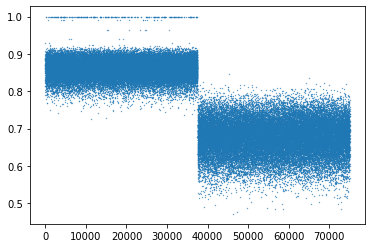

In [489]:
preds = model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=0.1)

In [490]:
print(lookup_model(model,x_train[-1],bf))

True


In [491]:
def calculate_fpr(model,bf,x_train,y_train):
    np=0
    y_pred = model.predict(x_train)
    for i in range(len(x_train)):
        if((y_pred[i]>0.99 or bf.lookup(x_train[i])) and y_train[i]==0):
            np+=1
            continue
        if((y_pred[i]<=0.99 and bf.lookup(x_train[i])==False) and y_train[i]==1):
            print(i)
            return -1
   # neg=len(y_train)-K.sum(y_train) #counting no of zeros
    sumn=0
    for i in y_train:
        sumn+=i
    print(sumn)
    print(len(y_train))
    print(np)
    #print(y_train.dtype)
    neg=len(y_train)-sumn
    return float(np/neg)

In [492]:
print(calculate_fpr(model,bf,x_train,y_train))

26047
-1


In [493]:
model.predict(x_train[5])

array([[0.80242217]], dtype=float32)

In [494]:
bf.lookup(x_train[5])

True

In [495]:
y_t[5]

array([1])